In [1]:
# Execute when running on Google Colab
#!pip install neograd

In [ ]:
# Execute when running locally
# import sys
# sys.path.insert(0, '../tests')
# import _setup
# !pip install matplotlib
# import matplotlib.pyplot as plt

In [3]:
import neograd as ng
import numpy as np
from neograd.nn.loss import BCE
from neograd.nn.optim import Adam, Momentum, RMSProp, GD
from neograd.autograd.utils import grad_check
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [4]:
X, y = make_circles(n_samples=1000, noise=0.05, random_state=100)
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X,y)

In [5]:
num_train = 750
num_test = 250
num_iter = 50

In [6]:
X_train, X_test = ng.tensor(X_train_orig[:num_train,:]), ng.tensor(X_test_orig[:num_test,:])
y_train, y_test = ng.tensor(y_train_orig[:num_train].reshape(num_train,1)), ng.tensor(y_test_orig[:num_test].reshape(num_test,1))

In [7]:
class NN(ng.nn.Model):
  def __init__(self):
    self.stack = ng.nn.Sequential(
      ng.nn.Linear(2,100),
      ng.nn.ReLU(),
      ng.nn.Linear(100,1),
      ng.nn.Sigmoid()
    )
  
  def forward(self, inputs):
    return self.stack(inputs)

In [8]:
model = NN()
loss_fn = BCE()
optim = Adam(model.get_params(), 0.05)

In [9]:
def train(optim, model=model, num_iter=num_iter, loss_list=None, print_freq=1, print_vals=False):
  for i in range(num_iter):
    optim.zero_grad()
    outputs = model(X_train)
    loss = loss_fn(outputs, y_train)
    if loss_list is not None:
      loss_list.append(loss.data)
    loss.backward()
    optim.step()
    if i%print_freq==0 and print_vals:
      print(f"iter {i+1}/{num_iter}\nloss: {loss}\n")

In [10]:
train(optim, print_vals=True)

iter 1/50
loss: Tensor( 10.573415001056283,
 requires_grad=True,
 grad_fn=None,
 shape=() )


iter 2/50
loss: Tensor( 9.999878049460742,
 requires_grad=True,
 grad_fn=None,
 shape=() )


iter 3/50
loss: Tensor( 9.503995618140651,
 requires_grad=True,
 grad_fn=None,
 shape=() )


iter 4/50
loss: Tensor( 8.970648294433975,
 requires_grad=True,
 grad_fn=None,
 shape=() )


iter 5/50
loss: Tensor( 9.125182818581274,
 requires_grad=True,
 grad_fn=None,
 shape=() )


iter 6/50
loss: Tensor( 8.49572467755151,
 requires_grad=True,
 grad_fn=None,
 shape=() )


iter 7/50
loss: Tensor( 8.384108871956048,
 requires_grad=True,
 grad_fn=None,
 shape=() )


iter 8/50
loss: Tensor( 8.336334098681508,
 requires_grad=True,
 grad_fn=None,
 shape=() )


iter 9/50
loss: Tensor( 7.789644554785993,
 requires_grad=True,
 grad_fn=None,
 shape=() )


iter 10/50
loss: Tensor( 7.432107005136127,
 requires_grad=True,
 grad_fn=None,
 shape=() )


iter 11/50
loss: Tensor( 7.2242398020762995,
 requires_grad=True,
 gr

In [11]:
with model.eval():
  test_outputs = model(X_test)
  preds = np.where(test_outputs.data>=0.5, 1, 0)

In [12]:
print(classification_report(y_test.data.astype(int).flatten(), preds.flatten()))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       124
           1       0.99      1.00      1.00       126

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



In [13]:
print(accuracy_score(y_test.data.astype(int).flatten(), preds.flatten()))

0.996


In [24]:
adam_losses = []
momentum_losses = []
rms_losses = []
gd_losses = []

losses = [
  adam_losses,
  momentum_losses,
  rms_losses,
  gd_losses
]

In [25]:
optims = [
  Adam,
  Momentum,
  RMSProp,
  GD
]

In [26]:
num_iter = 100

In [27]:
for optim,loss_list in zip(optims, losses):
  model = NN() # Resetting the model, to remove the previously learnt weights
  train(optim(model.get_params(), 0.005), model=model, num_iter=num_iter, loss_list=loss_list)

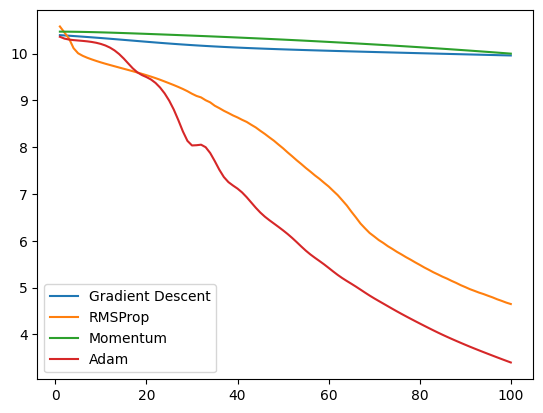

In [28]:
plt.plot(np.arange(1, num_iter+1, 1), gd_losses, label='Gradient Descent')
plt.plot(np.arange(1, num_iter+1, 1), rms_losses, label='RMSProp')
plt.plot(np.arange(1, num_iter+1, 1), momentum_losses, label='Momentum')
plt.plot(np.arange(1, num_iter+1, 1), adam_losses, label='Adam')
plt.legend()
plt.show()

In [29]:
grad_check(model, X_train, y_train, loss_fn)

Gradient Check Distance: 8.415739367777593e-08
Gradient Check PASSED


8.415739367777593e-08